# Galveston Parcel Data Map

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [79]:
# read zoning shapefile using the GeoPandas library
# shapefile is the basis of making a map
# it is downloaded from the Galveston city GIS website
galv_zones = gpd.read_file("Zoning_Districts.shp")
galv_zones.head()

,OBJECTID_1,OBJECTID,ZONING,OVERLAY,DISTNAME,DISTDESC,CHANGED,REVIEW,ORD___,DATE_,PREV_ZONE,LANDUSE,CREATED_US,CREATED_DA,LAST_EDITE,LAST_EDI00,SHAPE_AREA,SHAPE_LEN,geometry
0,39,0.0,R-2,None,"Residential, Townhouse",The R-2 district provides for attached forms o...,0.0,0.0,None,None,None,Residential,None,None,None,None,None,None,"POLYGON ((3287045.474 13663214.894, 3286850.48..."
1,40,0.0,RES/REC,None,Resort/Recreation,The RES/REC district is intended to provide a ...,0.0,0.0,None,None,None,Commercial,None,None,None,None,None,None,"POLYGON ((3276230.590 13656282.691, 3276420.17..."
2,42,0.0,RES/REC,-HDDZ-5,Resort/Recreation,The RES/REC district is intended to provide a ...,0.0,0.0,None,None,None,Commercial,None,None,None,None,None,None,"POLYGON ((3286991.016 13661772.569, 3287094.17..."
3,43,0.0,RES/REC,None,Resort/Recreation,The RES/REC district is intended to provide a ...,0.0,0.0,None,None,None,Commercial,None,None,None,None,None,None,"POLYGON ((3287392.887 13664938.086, 3287705.10..."
4,44,0.0,R-1,None,"Residential, Single-Family",The R-1 district is intended to provide for si...,0.0,0.0,None,None,None,Residential,None,None,None,None,None,None,"POLYGON ((3288825.755 13660989.011, 3288339.55..."


In [80]:
# number of different types of zones
galv_zones['ZONING'].value_counts()

C              94
R-1            64
UN             61
R-3            39
CB             38
RES/REC        33
MF             20
R-2            15
R-0            11
LI             10
TN              5
HI              5
Water (R-1)     1
Name: ZONING, dtype: int64

### Galveston Zoning Code Metadata

- R-2 = Residential, Duplex - Eightplex
- RES/REC = Resort/Recreation
- R-1 = Residential, Single-Family
- UN = Urban Neighborhood
- C = Commercial
- CB = Central Business
- R-3 = Residential, Single-Family, Historic District
- MF = Multifamily
- TN = Traditional Neighborhood
- HI = Industrial, Heavy
- R-0 = Residential, Single-Family detached
- LI = Industrial, Light
- Water (R-1) = Water (R-1)

In [81]:
# remove the ocean parcel since it is not useful
galv_zones = galv_zones[galv_zones['ZONING']!= "Water (R-1)"]
galv_zones = galv_zones.reset_index()

In [82]:
# recode each zoning type into human language for the ease of understanding
galv_zones['coded_zoning'] = galv_zones['ZONING']
for i in range(0,len(galv_zones)):
    if galv_zones['ZONING'][i] == "R-2":
        galv_zones['coded_zoning'][i] = "Duplex-Eightplex Residential"
    if galv_zones['ZONING'][i] == "RES/REC":
        galv_zones['coded_zoning'][i] = "Resort & Recreation"
    if galv_zones['ZONING'][i] == "R-1":
        galv_zones['coded_zoning'][i] = "Single-Family Residential"
    if galv_zones['ZONING'][i] == "UN":
        galv_zones['coded_zoning'][i] = "Urban Neighborhood"
    if galv_zones['ZONING'][i] == "C":
        galv_zones['coded_zoning'][i] = "Commercial"
    if galv_zones['ZONING'][i] == "CB":
        galv_zones['coded_zoning'][i] = "Commercial"
    if galv_zones['ZONING'][i] == "R-3":
        galv_zones['coded_zoning'][i] = "Single-Family Historic Residential"
    if galv_zones['ZONING'][i] == "MF":
        galv_zones['coded_zoning'][i] = "Multifamily Residential"
    if galv_zones['ZONING'][i] == "TN":
        galv_zones['coded_zoning'][i] = "Traditional Neighborhood"
    if galv_zones['ZONING'][i] == "HI":
        galv_zones['coded_zoning'][i] = "Industrial"
    if galv_zones['ZONING'][i] == "R-0":
        galv_zones['coded_zoning'][i] = "Single-Family Detached Residential"
    if galv_zones['ZONING'][i] == "LI":
        galv_zones['coded_zoning'][i] = "Industrial"

In [83]:
galv_zones.head()

,index,OBJECTID_1,OBJECTID,ZONING,OVERLAY,DISTNAME,DISTDESC,CHANGED,REVIEW,ORD___,...,PREV_ZONE,LANDUSE,CREATED_US,CREATED_DA,LAST_EDITE,LAST_EDI00,SHAPE_AREA,SHAPE_LEN,geometry,coded_zoning
0,0,39,0.0,R-2,None,"Residential, Townhouse",The R-2 district provides for attached forms o...,0.0,0.0,None,...,None,Residential,None,None,None,None,None,None,"POLYGON ((3287045.474 13663214.894, 3286850.48...",Duplex-Eightplex Residential
1,1,40,0.0,RES/REC,None,Resort/Recreation,The RES/REC district is intended to provide a ...,0.0,0.0,None,...,None,Commercial,None,None,None,None,None,None,"POLYGON ((3276230.590 13656282.691, 3276420.17...",Resort & Recreation
2,2,42,0.0,RES/REC,-HDDZ-5,Resort/Recreation,The RES/REC district is intended to provide a ...,0.0,0.0,None,...,None,Commercial,None,None,None,None,None,None,"POLYGON ((3286991.016 13661772.569, 3287094.17...",Resort & Recreation
3,3,43,0.0,RES/REC,None,Resort/Recreation,The RES/REC district is intended to provide a ...,0.0,0.0,None,...,None,Commercial,None,None,None,None,None,None,"POLYGON ((3287392.887 13664938.086, 3287705.10...",Resort & Recreation
4,4,44,0.0,R-1,None,"Residential, Single-Family",The R-1 district is intended to provide for si...,0.0,0.0,None,...,None,Residential,None,None,None,None,None,None,"POLYGON ((3288825.755 13660989.011, 3288339.55...",Single-Family Residential


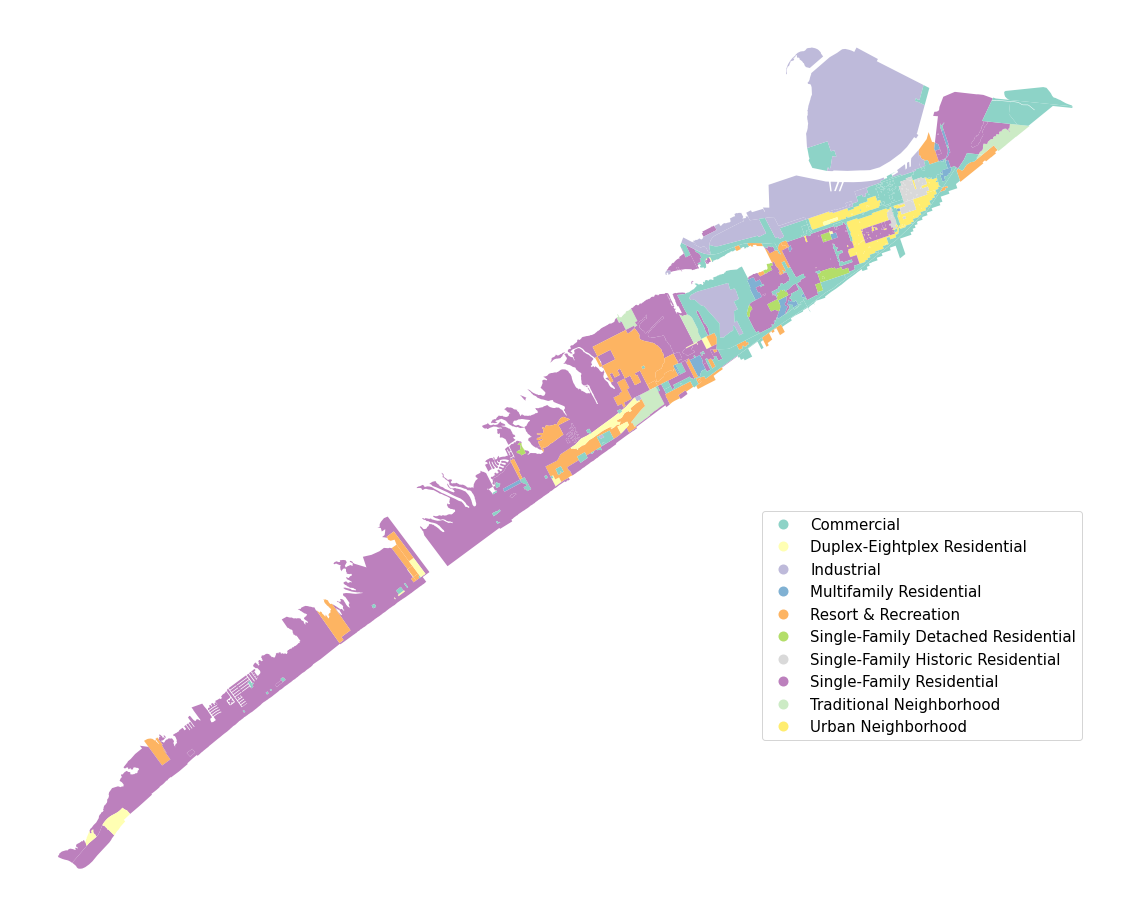

In [84]:
ax = galv_zones.plot(
    column = 'coded_zoning', cmap = "Set3", 
    figsize = (20,20), legend=True,
    legend_kwds={'bbox_to_anchor':(0.97,0.45), 'fontsize': 15}
)
ax.set_axis_off()

# Galveston Parcel Map (NEW)

## This is made from the new, correct parcel data shapefile downloaded from https://galvestoncad.org/gis-data/

In [2]:
# read parcel shapefile using the GeoPandas library
# shapefile is the basis of making a map
# it is downloaded from the Galveston city GIS website
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
parcel_df = gpd.read_file("./Galv_Parcels_Shapefiles/gal_parcel.shp")
parcel_df.head()

,OBJECTID_l,ID,GEOID,NAME,ADDRESS,ADDRESS2,ADDRESS3,CITY,ST,ZIP,SITUS_NO,SITUS,LEGAL,ENTITIES,ACRES,LANDUSE,PAGE,NBHD,INTEREST,EXEMPT,FLAGS,SECURE,VAL22LAND,VAL22IMP,VAL22TOT,Shape_Leng,Shape_Area,index_righ,OBJECTID_r,Name_1,Code,Shape_Le_1,Shape_Ar_1,geometry
0,1,436684,5912-4000-0001-000,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,27230,"27230 ESTUARY DR GALVESTON, TX 77554","POINTE WEST SEC 4-D REPLAT NO 1 (2007), ABST 1...","C30, CAD, GGA, J01, RFL, S10",1.4300,CO,556-D,5912,100,None,WGI,F,69520,0,69520,1427.244952,6.686772e+04,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,"POLYGON ((-95.11211 29.09321, -95.11205 29.093..."
1,2,432154,0121-0001-0010-000,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,None,"SAN LUIS PASS RD GALVESTON, TX 77554",ABST 121 HALL & JONES SUR TR 1-10 ACRES 85.934,"C30, CAD, GGA, J01, RFL, S10",85.9340,"ML, WF",556-B,0121,100,None,"18RN, WGI",F,69710,0,69710,10675.442458,3.743268e+06,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,"POLYGON ((-95.11336 29.09335, -95.11323 29.093..."
2,3,436685,5912-4000-0002-000,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,27220,"27220 ESTUARY DR GALVESTON, TX 77554","POINTE WEST SEC 4-D REPLAT NO 1 (2007), ABST 1...","C30, CAD, GGA, J01, RFL, S10",0.7570,CO,556-D,5912,100,None,WGI,F,70540,0,70540,767.678590,3.335669e+04,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,"POLYGON ((-95.11151 29.09375, -95.11166 29.093..."
3,4,436686,5912-4000-0003-000,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,27130,"27130 ESTUARY DR GALVESTON, TX 77554","POINTE WEST SEC 4-D REPLAT NO 1 (2007), ABST 1...","C30, CAD, GGA, J01, RFL, S10",0.9950,CO,556-D,5912,100,None,WGI,F,72520,0,72520,921.451609,4.332103e+04,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,"POLYGON ((-95.11156 29.09466, -95.11156 29.094..."
4,5,729563,5912-4000-0000-007,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,None,None,"POINTE WEST SEC 4-D REPLAT NO 1 (2007), ABST 1...","C30, CAD, GGA, J01, RFL, S10",4.1344,GB,556-D,7323,100,None,WGI,F,360,0,360,4161.981292,1.838646e+05,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,"POLYGON ((-95.11162 29.09478, -95.11161 29.094..."


In [3]:
parcel_df.shape

(28187, 34)

In [4]:
# recode the categories based on land use type documentation
Coded_LANDUSE = []
for i in range(0,len(parcel_df)):
    landuse = parcel_df['LANDUSE'][i]
    if landuse == 'IND':
        Coded_LANDUSE.append("Industrial")
    elif landuse == 'CDO':
        Coded_LANDUSE.append("Condo")
    elif landuse == 'CL':
        Coded_LANDUSE.append("Commercial")
    elif landuse == 'CO':
        Coded_LANDUSE.append("Commercial")
    elif landuse == 'RA':
        Coded_LANDUSE.append("Residential Acreage")
    elif landuse == 'RL':
        Coded_LANDUSE.append("Residential Lot")
    elif landuse == 'TL':
        Coded_LANDUSE.append("Townhome")
    else:
        Coded_LANDUSE.append("Not of Interest")
parcel_df['Coded_LANDUSE'] = Coded_LANDUSE

In [5]:
parcel_df.head()

,OBJECTID_l,ID,GEOID,NAME,ADDRESS,ADDRESS2,ADDRESS3,CITY,ST,ZIP,SITUS_NO,SITUS,LEGAL,ENTITIES,ACRES,LANDUSE,PAGE,NBHD,INTEREST,EXEMPT,FLAGS,SECURE,VAL22LAND,VAL22IMP,VAL22TOT,Shape_Leng,Shape_Area,index_righ,OBJECTID_r,Name_1,Code,Shape_Le_1,Shape_Ar_1,geometry,Coded_LANDUSE
0,1,436684,5912-4000-0001-000,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,27230,"27230 ESTUARY DR GALVESTON, TX 77554","POINTE WEST SEC 4-D REPLAT NO 1 (2007), ABST 1...","C30, CAD, GGA, J01, RFL, S10",1.4300,CO,556-D,5912,100,None,WGI,F,69520,0,69520,1427.244952,6.686772e+04,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,"POLYGON ((-95.11211 29.09321, -95.11205 29.093...",Commercial
1,2,432154,0121-0001-0010-000,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,None,"SAN LUIS PASS RD GALVESTON, TX 77554",ABST 121 HALL & JONES SUR TR 1-10 ACRES 85.934,"C30, CAD, GGA, J01, RFL, S10",85.9340,"ML, WF",556-B,0121,100,None,"18RN, WGI",F,69710,0,69710,10675.442458,3.743268e+06,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,"POLYGON ((-95.11336 29.09335, -95.11323 29.093...",Not of Interest
2,3,436685,5912-4000-0002-000,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,27220,"27220 ESTUARY DR GALVESTON, TX 77554","POINTE WEST SEC 4-D REPLAT NO 1 (2007), ABST 1...","C30, CAD, GGA, J01, RFL, S10",0.7570,CO,556-D,5912,100,None,WGI,F,70540,0,70540,767.678590,3.335669e+04,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,"POLYGON ((-95.11151 29.09375, -95.11166 29.093...",Commercial
3,4,436686,5912-4000-0003-000,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,27130,"27130 ESTUARY DR GALVESTON, TX 77554","POINTE WEST SEC 4-D REPLAT NO 1 (2007), ABST 1...","C30, CAD, GGA, J01, RFL, S10",0.9950,CO,556-D,5912,100,None,WGI,F,72520,0,72520,921.451609,4.332103e+04,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,"POLYGON ((-95.11156 29.09466, -95.11156 29.094...",Commercial
4,5,729563,5912-4000-0000-007,CRVI HPW TRS INC,None,1601 S MOPAC EXPWY STE D-175,None,AUSTIN,TX,78746,None,None,"POINTE WEST SEC 4-D REPLAT NO 1 (2007), ABST 1...","C30, CAD, GGA, J01, RFL, S10",4.1344,GB,556-D,7323,100,None,WGI,F,360,0,360,4161.981292,1.838646e+05,29,30,CITY OF GALVESTON,C30,186359.261489,2.612547e+08,"POLYGON ((-95.11162 29.09478, -95.11161 29.094...",Not of Interest


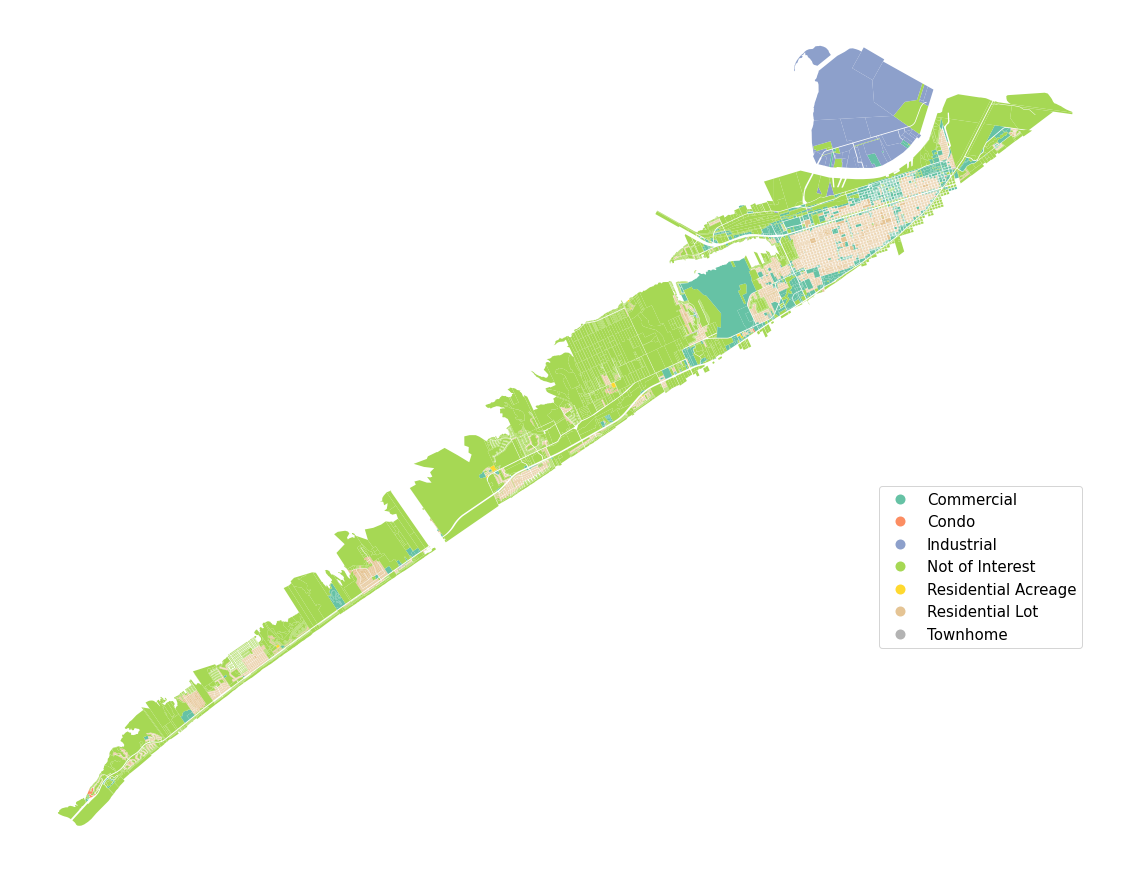

In [7]:
ax = parcel_df.plot(
    column = 'Coded_LANDUSE', cmap = "Set2", 
    figsize = (20,20), legend=True,
    legend_kwds={'bbox_to_anchor':(0.97,0.45), 'fontsize': 15}
)
ax.set_axis_off()

In [10]:
parcel_df.to_file('Galv_Parcel_Complete.geojson', driver = 'GeoJSON')